<a href="https://colab.research.google.com/github/MaxSMCON/Group_2/blob/main/Group_2_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project

## Global food in 

in this project we are going to investigate 

In [2]:
# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing




In [55]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
import requests
import io
from io import StringIO
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

# StatsModel
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# 1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG
#https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# Introduction

# Loading the Glovbal Food dataset from goolgle drive [Fact Table]


In [5]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY",
                                    dest_path="./global_food_prices.csv",
                                    unzip=False)
data = pd.read_csv("global_food_prices.csv")
df = data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Loading GDP data from GitHub 

In [60]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
df_gdp = pd.read_csv(url, index_col=0, encoding= 'latin-1' )
# df2 = df_gdp.melt(id_vars=["Country", "Subject Descriptor","Units","Scale","Country/Series-specific Notes"],var_name="Year",value_name="Value")
df_gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,453.484,492.903,496.209,554.91,584.658,662.65,688.247,829.924,899.956,958.266,"1,092.12","1,154.18","1,185.31","1,197.01","1,222.92","1,255.29","1,270.22","1,319.90","1,288.87",NaN,2019.0
Albania,"Gross domestic product, constant prices",National currency,Billions,Source: IMF Staff Estimates. Official national...,252.921,234.711,257.243,281.424,306.47,334.359,297.833,324.13,365.912,391.33,423.784,443.009,467.501,493.283,520.544,551.27,584.254,628.073,649.141,673.204,690.339,700.125,707.14,719.688,735.657,760.042,788.941,821.061,838.908,811.13,854.12,2020.0
Algeria,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office Latest actu...,"3,393.45","3,447.74","3,375.25","3,344.88","3,473.58","3,605.57","3,645.24","3,831.14","3,953.74","4,103.98","4,227.10","4,463.82","4,785.21","4,990.98","5,285.44","5,374.48","5,555.75","5,686.88","5,779.70","5,988.70","6,162.37","6,371.89","6,550.30","6,799.22","7,050.79","7,276.41","7,378.28","7,466.82","7,526.56","7,157.75","7,401.85",2019.0
Andorra,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office. Ministry o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.992,2.153,2.251,2.447,2.646,2.789,2.923,2.968,2.803,2.655,2.602,2.602,2.473,2.385,2.445,2.48,2.572,2.581,2.622,2.675,2.354,2.484,2020.0
Angola,"Gross domestic product, constant prices",National currency,Billions,Source: National Statistics Office. Ministry o...,283.298,315.601,350.22,387.031,427.141,475.013,509.567,533.472,545.109,561.76,585.388,665.385,685.279,760.338,874.608,975.606,"1,112.29","1,236.49","1,247.10","1,307.70","1,353.11","1,468.69","1,541.46","1,615.80","1,631.04","1,588.96","1,586.58","1,554.12","1,545.80","1,462.56","1,452.98",2020.0


## loading cost of living dataset from GitHUb

In [7]:
url1 = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/cost%20of%20living%202020.csv'
df_cost = pd.read_csv(url1,index_col=0)
df_cost.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
Rank 2020,,,,,,,,,
1,Bermuda,147.77,85.70,117.54,146.63,152.52,78.17,0.00,NaN
2,Switzerland,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
3,Norway,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN
4,Iceland,90.19,38.54,65.04,80.91,97.17,74.78,13.31,NaN
5,Japan,86.22,26.18,56.98,86.84,48.07,78.88,6.70,NaN


## LOADING Countries list by region [Dimension Table]

In [8]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UNSD%20%E2%80%94%20Methodology.csv '
df_countries = pd.read_csv(url, index_col=0)
df_region = df_countries[['Region Name','Intermediate Region Name','Country or Area'] ]
df_region = df_region.rename( columns = {'Region Name': 'Continent', 'Intermediate Region Name': 'Region', 'Country or Area': 'Country' })
df_region.head()


,Continent,Region,Country
Global Code,,,
1,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
1,Africa,Northern Africa,Libya
1,Africa,Northern Africa,Morocco
1,Africa,Northern Africa,Sudan


In [9]:
# Removing duplicates from country list
df_region = df_region.drop_duplicates(subset = ['Country'])


In [10]:
df_region.dropna(inplace=True)

In [11]:
df_region.isnull().sum()

Continent    0
Region       0
Country      0
dtype: int64

In [25]:
df = data.copy()
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Child Mortality Upload 

In [51]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/child-deaths-igme-data.csv'
df_childMort = pd.read_csv(url, index_col=0)
df_childMort.head()

,Code,Year,Number of under-five deaths
Entity,,,
Afghanistan,AFG,1967,161588
Afghanistan,AFG,1968,162629
Afghanistan,AFG,1969,163529
Afghanistan,AFG,1970,164463
Afghanistan,AFG,1971,165306


## Birth rate vs Death rate Upload

In [52]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate.head()

,Code,Year,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Continent
Entity,,,,,,
Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
Afghanistan,AFG,1960,32.219,51.279,8996967.0,NaN
Afghanistan,AFG,1961,31.649,51.373,9169406.0,NaN
Afghanistan,AFG,1962,31.093,51.457,9351442.0,NaN
Afghanistan,AFG,1963,30.551,51.530,9543200.0,NaN


## Create Date Column

In [44]:
# Create a Date Column
df["Date"] = [  y+ " " +x for x,y in list(zip(df["mp_month"].astype(str).values, df["mp_year"].astype(str).values)) ]
df["Date"] = pd.to_datetime(df["Date"])

In [48]:
df = df.set_index("Date")

## Renaming columns

In [ ]:
df = df.rename(columns = {'adm0_name' : 'Country', 'mkt_name': 'city',} )
df = df.drop(columns= {'adm1_name'})
df.head()

## Leaving comodity names with the first words

In [37]:
df['cm_name'] = df['cm_name'].str.split(" ", 1, expand = True)
df['cm_name'].head()

0    Bread
1    Bread
2    Bread
3    Bread
4    Bread
Name: cm_name, dtype: object

In [38]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Retail prices

In [46]:
df_retail = df.loc[df['pt_name'] == 'Retail']
df_retail.nunique()

adm0_id                   89
Country                   89
adm1_id                  818
mkt_id                  3083
city                    3058
cm_id                    587
cm_name                  148
cur_id                     1
cur_name                  76
pt_id                      1
pt_name                    1
um_id                    103
um_name                  103
mp_month                  12
mp_year                   32
mp_price              213111
mp_commoditysource         0
Date                     380
dtype: int64

## Currency Conversion Table

In [53]:
df_currency = df.loc[df['cm_name'] == 'Exchange']
df_currency.nunique()

adm0_id                 16
Country                 16
adm1_id                146
mkt_id                 329
city                   323
cm_id                    2
cm_name                  1
cur_id                   1
cur_name                16
pt_id                    1
pt_name                  1
um_id                    1
um_name                  1
mp_month                12
mp_year                 11
mp_price              3351
mp_commoditysource       0
dtype: int64

## Reshaping table

In [16]:
# Pivoting tables under construction
# df = df.pivot(columns = 'cm_name', values = 'pt_id')
# df.head()

## Merging food prices with country region

In [47]:

df5 = pd.merge(
    df_retail,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df5.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date,Continent,Region
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,2014-01-01,Asia,Southern Asia
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,2014-02-01,Asia,Southern Asia
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,2014-03-01,Asia,Southern Asia
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,2014-04-01,Asia,Southern Asia
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,2014-05-01,Asia,Southern Asia


In [42]:
# Merge Check
print(df_retail.shape)
df5.shape

(1878421, 17)


(1878421, 19)

In [43]:
df5.isnull().sum()

adm0_id                     0
Country                     0
adm1_id                     0
mkt_id                      0
city                        0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    1878421
Continent              162596
Region                 162596
dtype: int64

## Group by Continent, Region, Country

In [20]:
df5.groupby(['Continent', 'Region', 
            #  'Country'
             ])['mp_price'].agg({'mean', 'count', 'std'}).round(1)


count       std     mean
Continent Region                                       
Africa    Eastern Africa      456211  200607.9   8591.3
          Middle Africa       108177   11309.2   4940.1
          Northern Africa      55194     629.2     80.4
          Southern Africa      17301      26.0     22.5
          Western Africa      442056   10232.6   2266.6
Americas  Caribbean            15768     596.8    275.3
          Central America      28219     331.4    164.1
          South America        36158  302309.7  37776.9
Asia      Central Asia         92700     139.2     77.5
          Eastern Asia          6376    2582.5   1960.8
          South-eastern Asia  236009   24581.1  14565.9
          Southern Asia        56013  117271.5   6494.1
          Western Asia        299791   49916.4   8124.0
Europe    Eastern Europe       30615      27.8     27.0

# Visual Inspection

<li> Dollar convertion as of today for better representation

<Figure size 432x288 with 0 Axes>

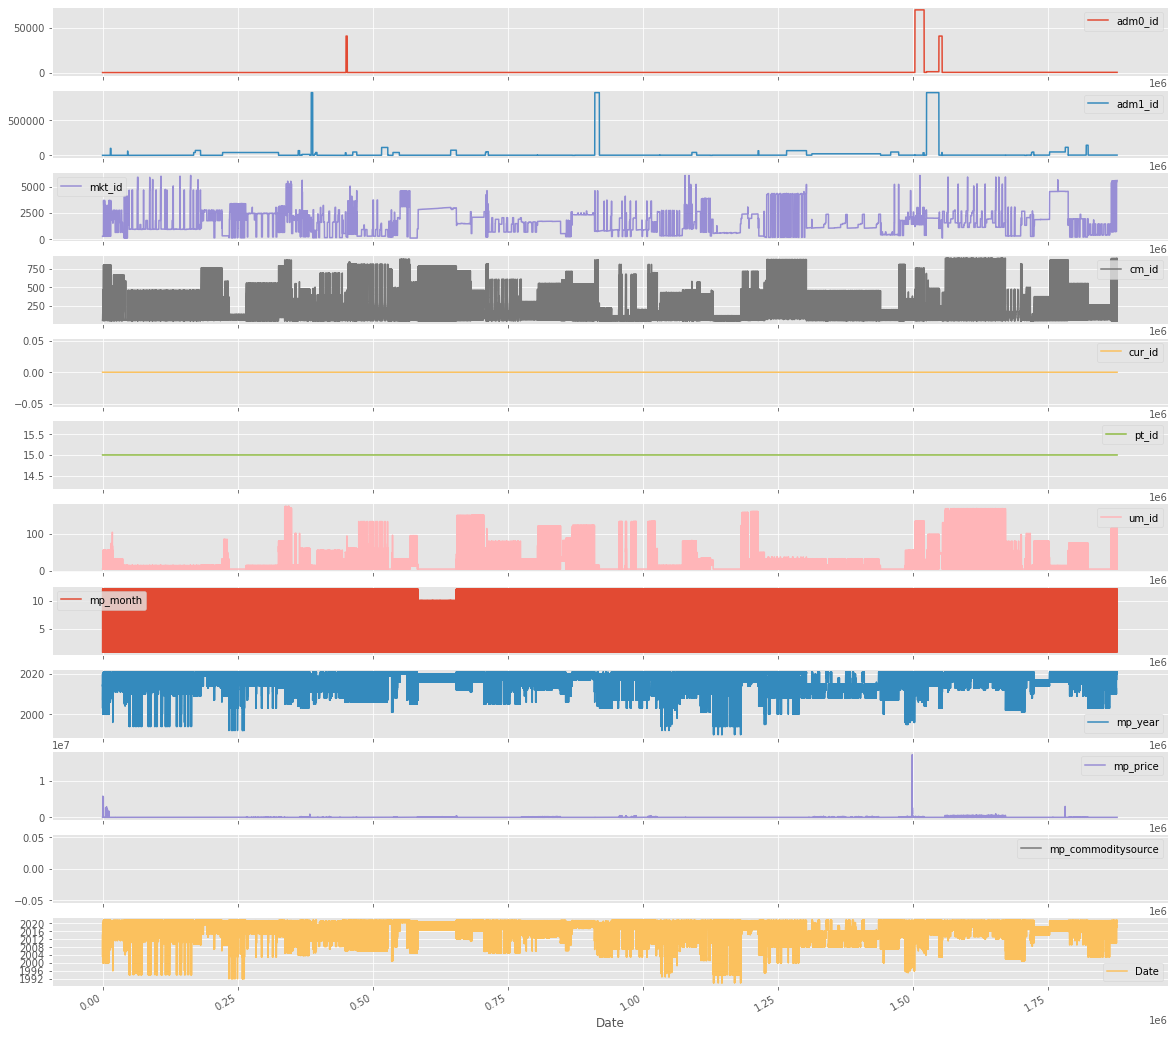

In [49]:
plt.figure()
df5.plot(subplots=True, figsize=(20,20))
plt.xlabel("Date");

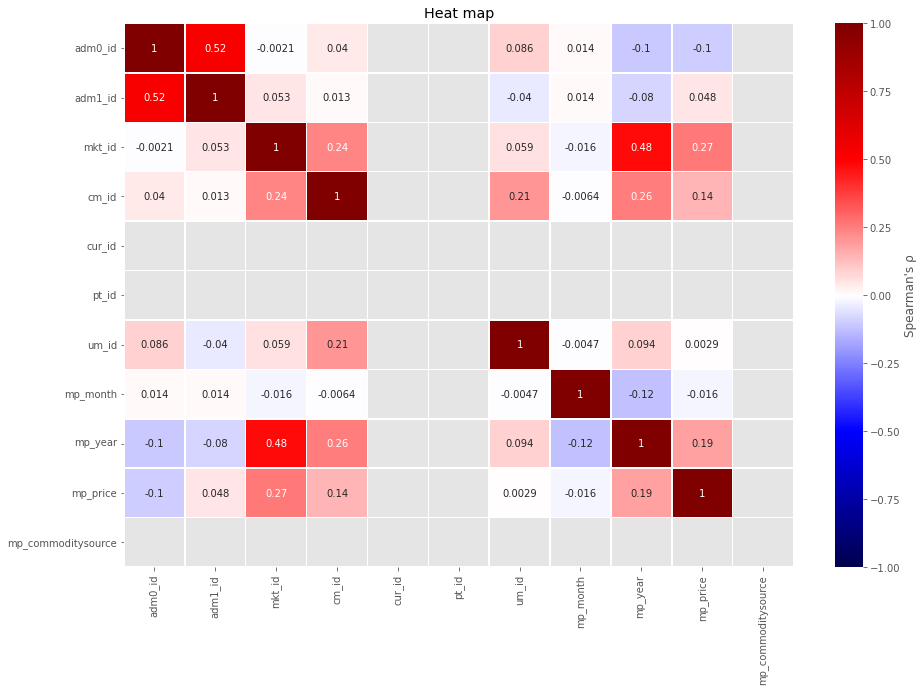

In [50]:
df_cm = df5.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");